<a href="https://colab.research.google.com/github/umamage/Dictionary/blob/master/CLIP_expt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install git+https://github.com/openai/clip

  Cloning https://github.com/openai/clip to /tmp/pip-req-build-iy6xpfg1
  Running command git clone --filter=blob:none --quiet https://github.com/openai/clip /tmp/pip-req-build-iy6xpfg1
  Resolved https://github.com/openai/clip to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 2.3 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369490 sha256=edf800b0bd9aab4faa892e57665f354705c8046c844ce3615a55609cf0cab674
  Stored in directory: /tmp/pip-ephem-wheel-cache-nifxqxfr/wheels/1f/79/1c/1fd0db79e903aa56e8aff0effc18abcca5e65dfd9230417259
Successfully built clip


In [2]:
pip install ftfy regex tqdm

In [3]:
import clip
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

100%|███████████████████████████████████████| 338M/338M [00:03<00:00, 97.3MiB/s]


In [8]:
from PIL import Image
all_images=[]
all_images.append(Image.open("girltiger.png"))
image = preprocess(all_images[0]).unsqueeze(0).to(device) # Preprocess the Image
descriptions = [
    "A Pictrue of a Tiger and Girl on Rocks",
    "A picture of Donkey and a Man",
    "A picture of a red car",
    "A picture of a Sparrow and Butterfly",
    "A picture of Animal and Human",
    ]
text = clip.tokenize(descriptions).to(device) # Tokenize the Text with CLIP
with torch.no_grad():
    logits_per_image, logits_per_text = model(image, text) # Pass both text and Image as Input to the model
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()


results = dict(zip(descriptions, map(lambda x: x*100, probs[0])))
results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1], reverse=True)} # Sorted Results
for text, percentage in results.items():
  print(f"Description: {text}, Similarity: {percentage}")

Description: A Pictrue of a Tiger and Girl on Rocks, Similarity: 99.98629093170166
Description: A picture of Animal and Human, Similarity: 0.013660118565894663
Description: A picture of a Sparrow and Butterfly, Similarity: 3.124389422737295e-05
Description: A picture of Donkey and a Man, Similarity: 1.4155301641949336e-05
Description: A picture of a red car, Similarity: 1.62787596735825e-06


In [11]:
import requests
from io import BytesIO
from typing import List

words_to_search = ["Giraffe", "Tiger", "Fruits"]
original_api = "https://pixabay.com/api/?key="
no_to_retrieve = 5
pixabay_api_key = "46028486-516f3d3465fdac2d7edc5f1bb"  # API key

for pixabay_search_keyword in words_to_search:

    pixabay_api = original_api+pixabay_api_key+"&q="+pixabay_search_keyword.lower()+"&image_type=photo&safesearch=true&per_page="+str(no_to_retrieve)
    response = requests.get(pixabay_api)
    output = response.json()

    for each in output["hits"]:
        imageurl = each["webformatURL"]
        response = requests.get(imageurl)
        image = Image.open(BytesIO(response.content)).convert("RGB")
        all_images.append(image)

In [17]:
pip install ipyplot==1.0.1

  Attempting uninstall: ipyplot
    Found existing installation: ipyplot 1.1.2
    Uninstalling ipyplot-1.1.2:
      Successfully uninstalled ipyplot-1.1.2



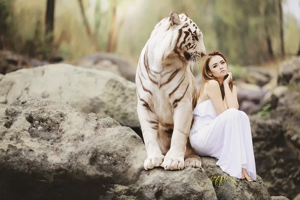
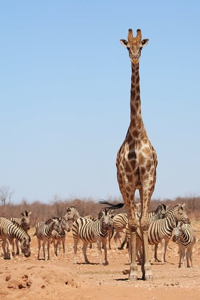
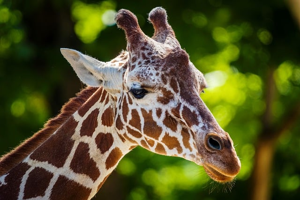
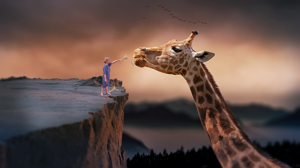
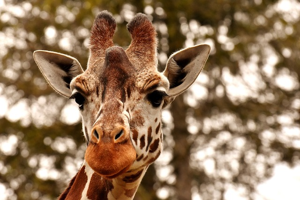
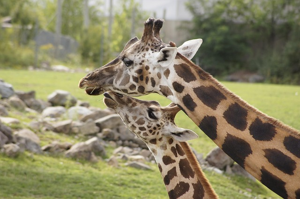
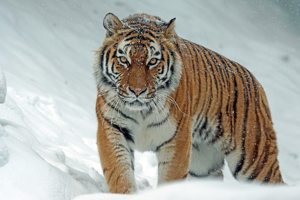
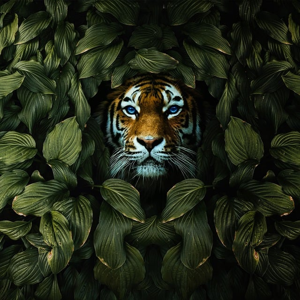
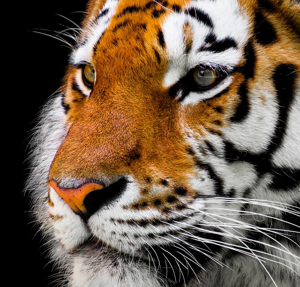
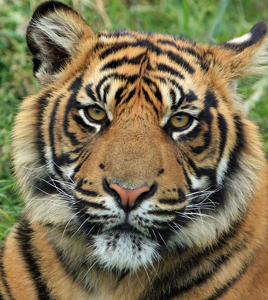
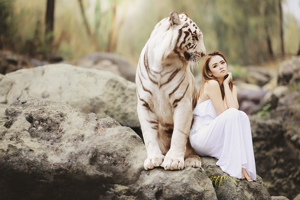
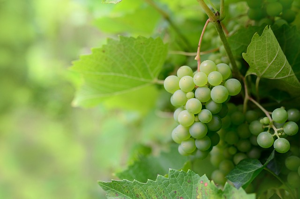
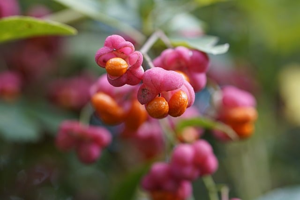
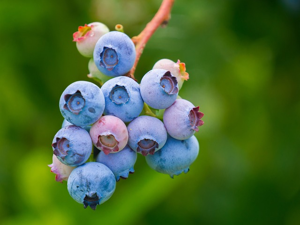
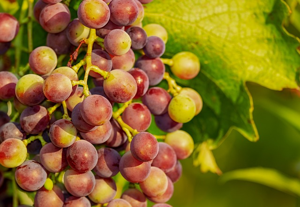
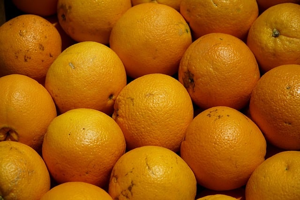

In [21]:
import ipyplot
ipyplot.plot_images(all_images,max_images =50,img_width=150)

In [22]:
input_image = [preprocess(im) for im in all_images]  # preprocess each Image

with torch.no_grad():
  image_embeddings = model.encode_image(torch.stack(input_image))  # Torch.Stack will help us to levragebatch processing to speed up the calculation

In [26]:
query = "A photo of Tiger"  # Input Query

query_tokens = clip.tokenize([query])  # Tokenize Before Embeddings

with torch.no_grad():
  query_embeddings = model.encode_text(query_tokens)

In [27]:
def calculate_similarity(query_embeddings, input_embeddings):
  similariries = query_embeddings @ input_embeddings.T
  return similariries

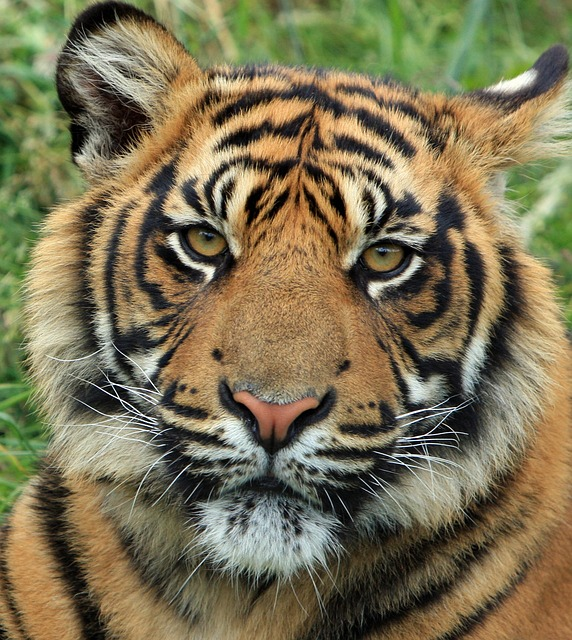

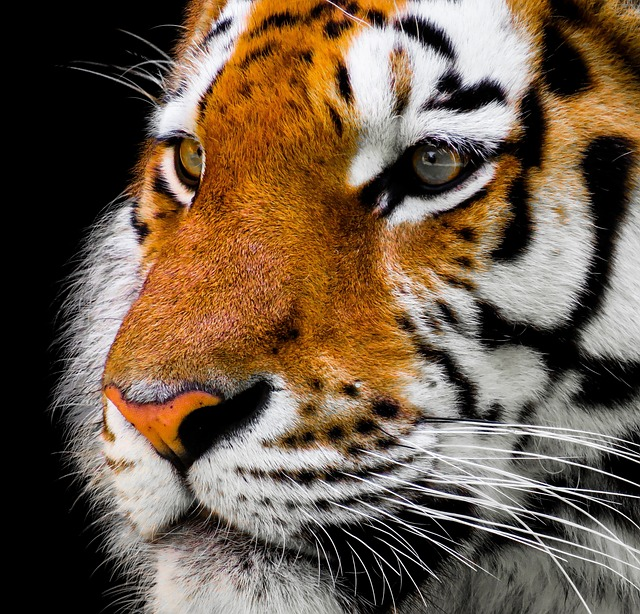

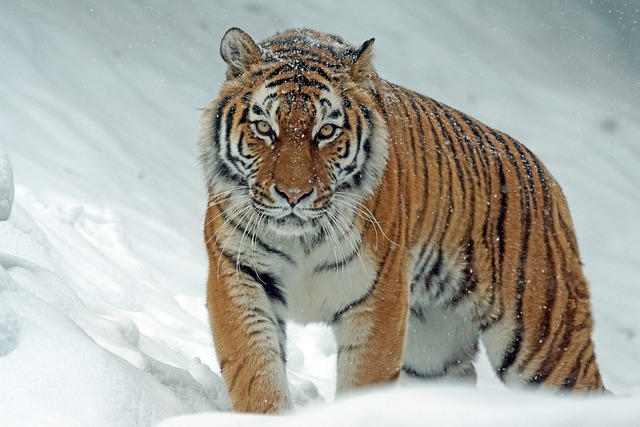

In [28]:
sim = calculate_similarity(query_embeddings, image_embeddings)

sim_dict= dict(zip(range(len(sim[0])), sim[0]))  # Use Dictionary to Sort the Results
sorted_sim = sorted(sim_dict.items(),key=lambda x:x[1],reverse=True)
top_sim = sorted_sim[:3]  # Get top 3 results

for i in top_sim:
  display(all_images[i[0]])

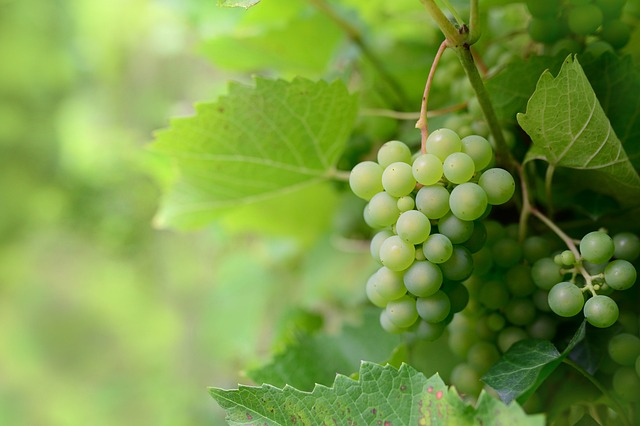

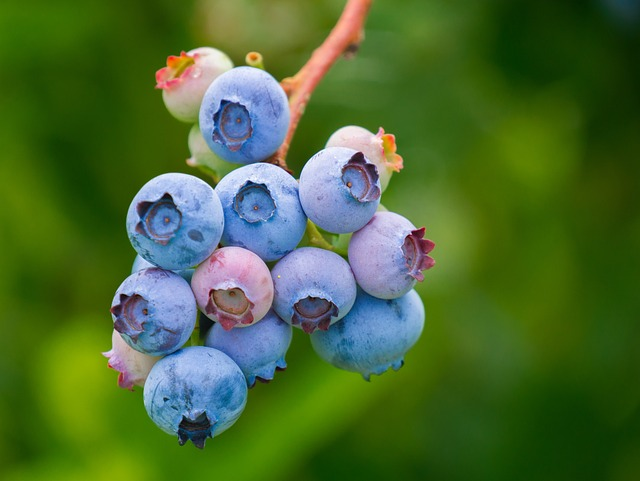

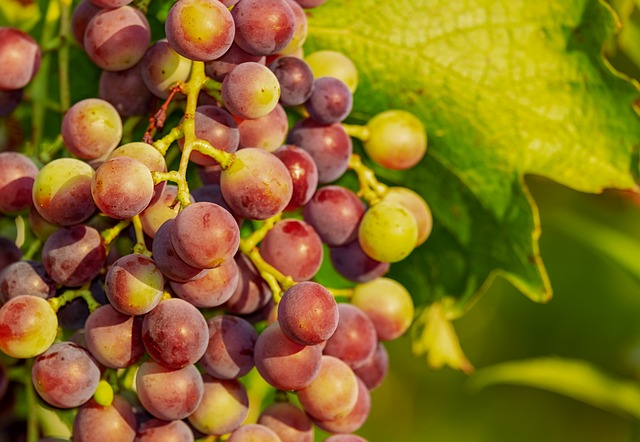

In [31]:
import cv2
from PIL import Image

query_image = cv2.imread('grapes.jpeg')

query_image = preprocess(Image.fromarray(query_image)).unsqueeze(0).to(device)

with torch.no_grad():
  query_embeddings = model.encode_image(query_image)

sim = calculate_similarity(query_embeddings, image_embeddings)
sim_dict= dict(zip(range(len(sim[0])), sim[0]))  # Use Dictionary to Sort the Results
sorted_sim = sorted(sim_dict.items(),key=lambda x:x[1],reverse=True)
top_sim = sorted_sim[:3]  # Get top 3 results

for i in top_sim:
  display(all_images[i[0]])